___

# Machine Learning in Geosciences ] 
Department of Applied Geoinformatics and Carthography, Charles University

Lukas Brodsky lukas.brodsky@natur.cuni.cz


## Deep Learning - Convolutional Neural Networks - Segmentation

Task: This notebook presents a CNN segmentation model programmed using the PyTorch library https://pytorch.org on the example of simulated images containing 3 shapes in random position. 

Architecture: U-Net

**Tasks**: 
    
 1. Develop a complete workflow with the CNN architecture for object segmentation.
    
 2. Change the noise level from 0.1 to 0.5 and 0.9 and evaluate the learning accuracy.

### Architektura U-Net

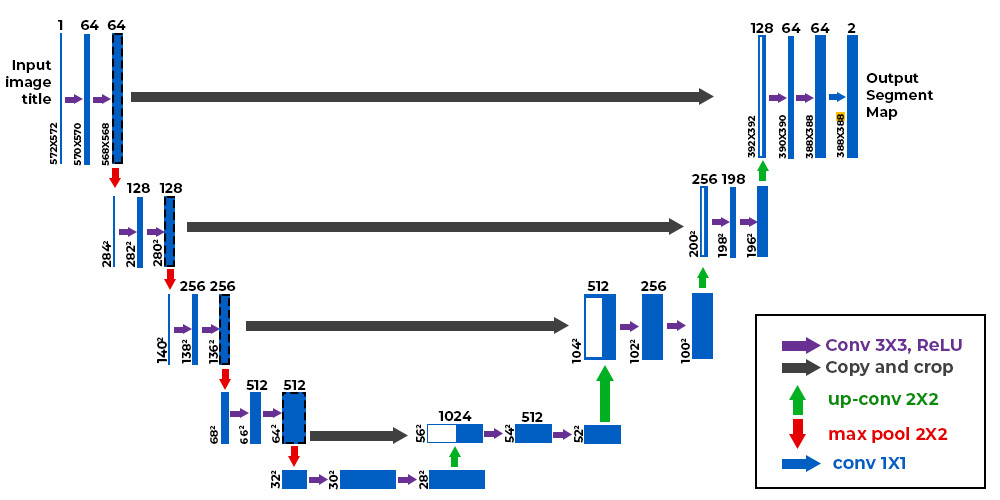

#### Main steps of the modelling workflow 
1. Loading the dataset
2. Create iterable dataset
3. Create model class
4. Instantiate model class
5. Instantiate loss class
6. Instantiate optimizer class
7. Model training 

In [ ]:
import numpy as np
np.random.seed(42) 
import matplotlib.pyplot as plt
import time 

# PyTorch imports 
import torch
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models
from torch.autograd import Variable

from torchsummary import summary
import segmentation_models_pytorch as smp

### Simulated data 

In [ ]:
# Skript pro simulaci dat 
from simulate_images import generate_image_shapes

In [ ]:
# Generating dat
height, width, count = 32, 32, 9
noise = 0.2
X, Y, y_label = generate_image_shapes(height, width, count, noise)

In [ ]:
X.shape

In [ ]:
torch.squeeze(torch.tensor(X)).shape

In [ ]:
Y.shape

In [ ]:
np.unique(y_label)

In [ ]:
image_no=1
print(f'Label: {y_label[image_no]}')
plt.subplot(1, 2, 1)
plt.imshow(X[image_no][0,:,:])
plt.subplot(1, 2, 2)
plt.imshow(Y[image_no][0,:,:], cmap='gray') 

In [ ]:
image_no=2
print(f'Label: {y_label[image_no]}')
plt.subplot(1, 2, 1)
plt.imshow(X[image_no][0,:,:])
plt.subplot(1, 2, 2)
plt.imshow(Y[image_no][0,:,:], cmap='gray') 

In [ ]:
image_no=7
print(f'Label: {y_label[image_no]}')
plt.subplot(1, 2, 1)
plt.imshow(X[image_no][0,:,:])
plt.subplot(1, 2, 2)
plt.imshow(Y[image_no][0,:,:], cmap='gray') 

### 1. Class for loading the dataset

In [ ]:
class SimDataset(Dataset):
    def __init__(self, height, width, count, noise, transform=None):
        self.input_images, self.target_masks, self.target_labels= generate_image_shapes(height, width, 
                                                                                        count, noise)
        self.transform = transform

    def __len__(self):
        return len(self.input_images)

    def __getitem__(self, idx):
        image = self.input_images[idx]
        # image typu float
        image_torch = torch.from_numpy(image).float()
        image_torch_rgb = torch.squeeze(torch.stack((image_torch,image_torch,image_torch),dim=0))
        # segmentační maska
        mask = self.target_masks[idx]
        # segmentacni maska typu long (int64)
        mask_torch = torch.squeeze(torch.from_numpy(mask).long())
        # kód tvaru 
        label= self.target_labels[idx] 
    
        if self.transform:
            image = self.transform(image)

        return [image_torch_rgb, mask_torch, label]


In [ ]:
# test 
height, width, count = 32, 32, 9 
noise = 0.1
train_size = 1 
sd = SimDataset(height, width, train_size, noise) 

In [ ]:
dl =  DataLoader(sd, batch_size=1, shuffle=True, num_workers=0)
sample, msk, lbl = next(iter(dl))
sample[0].shape

In [ ]:
msk.shape

### 2. Create iterable dataset

In [ ]:
def get_data_loaders(height, width, noise, train_size, test_size, batch_size=5):

    # height, width, count = 64, 64
    train_set = SimDataset(height, width, train_size, noise) # , transform = trans
    test_set = SimDataset(height, width, test_size, noise) # , transform = trans


    train_dataloader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
    test_dataloader = DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=0)


    return train_dataloader, test_dataloader


In [ ]:
### Příprava dat do dataloaderu (iterátor) 
batch_size = 9
height, width = 32, 32
noise = 0.1
train_dataloader, test_dataloader = get_data_loaders(height, width, noise, train_size=500, test_size=500, 
                                                     batch_size=batch_size)

In [ ]:
sample = next(iter(train_dataloader))
image, mask, label = sample

In [ ]:
image.dtype


In [ ]:
mask.dtype


###  3. Create model class

### Segmentation models
https://smp.readthedocs.io/en/latest/index.html 

**Segmentation model is based on PyTorch nn.Module:** 



`
import segmentation_models_pytorch as smp
model = smp.Unet(
    encoder_name=„resnet34“,     # emcoder, mobilenet_v2 or efficientnet-b7, ...
    encoder_weights=„imagenet“,  # weights initialization 
    in_channels=1,               # input channels (1 for grayscale images, 3 for RGB)
    classes=3,                   # output (number of classes)
)
`

**Model learning** 

`
for images, gt_masks in dataloader:

    predicted_mask = model(image)
    loss = loss_fn(predicted_mask, gt_masks)

    loss.backward()
    optimizer.step()
`

### 4. Instantiate model class

In [ ]:
model = smp.Unet('mobilenet_v2', encoder_weights='imagenet', classes=2, 
                 activation=None, encoder_depth=4, decoder_channels=[256, 128, 64, 32])


In [ ]:
summary(model, input_size=(3,32,32))

In [ ]:
# Prarametry modelu 
params = [p.numel() for p in model.parameters() if p.requires_grad]
print(params)

###  5. Instantiate loss class

In [ ]:
# Cross-Entropy Loss
pass


### 6. Instantiate optimizer class

In [ ]:
# optimizer 
learning_rate = pass

# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Adam()
pass 

### 7. Model training

In [ ]:
# Training 
start = time.time()

# epochs (TODO: more after test run )
num_epochs = 3

# loss_history = [] 
# train_loss, test_loss = [], []

iter = 0
for epoch in range(num_epochs):
    for phase in ['train', 'valid']:
        if phase == 'train':
            pass   # training mode 
            dataloader = pass 
        else:
            pass  # evaluation mode 
            dataloader = pass 

        step = 0
        # data iteration 
        for x, masks, y in dataloader:
            step += 1
            x = Variable(pass)
            y = Variable(pass)

            # forward step 
            if phase == 'train':
                # clear gradients 
                optimizer pass 
                # compute forward pass 
                outputs = pass 
                loss = pass 

                # backpropagation 
                loss pass 
                # optimalization step
                optimizer pass 

            else:
                # testing  
                with torch.no_grad():
                    outputs = pass 
                    # Convert y to LONG!!! 
                    loss = criterion(outputs, y.long())
            
            # accuracy evaluation 
            if phase=='train': 
                train_loss.append(loss)
                # if step % 10 == 0:
                print('Epocha: {}  training loss: {} '.format(epoch, loss)) 
            else: 
                test_loss.append(loss)
                # if step % 10 == 0:
                print('Epocha: {}  testing loss: {} '.format(epoch, loss)) 
                                        

print('---')
time_elapsed = time.time() - start
print('Training finished in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))        

#### Plot training and testing evolution 

In [ ]:
plt.plot(range(0, len(train_loss), 5), [l.item() for l in train_loss[::5]], 
         linewidth=0.5, label='Training loss')
plt.plot(range(0, len(test_loss), 5), [l.item() for l in test_loss[::5]], 
         linewidth=0.5, label='Testing loss')
plt.legend()